In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
import pandas as pd

data = pd.read_excel("OSA_extreme_both.xlsx")

#data = pd.read_excel("OSA_extreme_both.xlsx")


Saving OSA_extreme_both.xlsx to OSA_extreme_both.xlsx
User uploaded file "OSA_extreme_both.xlsx" with length 26018 bytes


Accuracy: 0.704 (0.060)   Precision: 0.619 (0.127)    Recall: 0.701 (0.127)


[Text(511.1678571428572, 587.0880000000001, 'Cervical <= 40.818\ngini = 0.482\nsamples = 412\nvalue = [245, 167]\nclass = Healthy'),
 Text(286.9714285714286, 456.624, 'Age <= 54.5\ngini = 0.302\nsamples = 205\nvalue = [167, 38]\nclass = Healthy'),
 Text(143.4857142857143, 326.1600000000001, 'BMI <= 38.365\ngini = 0.145\nsamples = 152\nvalue = [140, 12]\nclass = Healthy'),
 Text(71.74285714285715, 195.69600000000003, 'Gender <= 1.5\ngini = 0.104\nsamples = 146\nvalue = [138, 8]\nclass = Healthy'),
 Text(35.871428571428574, 65.23200000000008, 'gini = 0.0\nsamples = 74\nvalue = [74, 0]\nclass = Healthy'),
 Text(107.61428571428573, 65.23200000000008, 'gini = 0.198\nsamples = 72\nvalue = [64, 8]\nclass = Healthy'),
 Text(215.22857142857146, 195.69600000000003, 'BMI <= 39.902\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Severe'),
 Text(179.35714285714286, 65.23200000000008, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Severe'),
 Text(251.10000000000002, 65.23200000000008, 'gini =

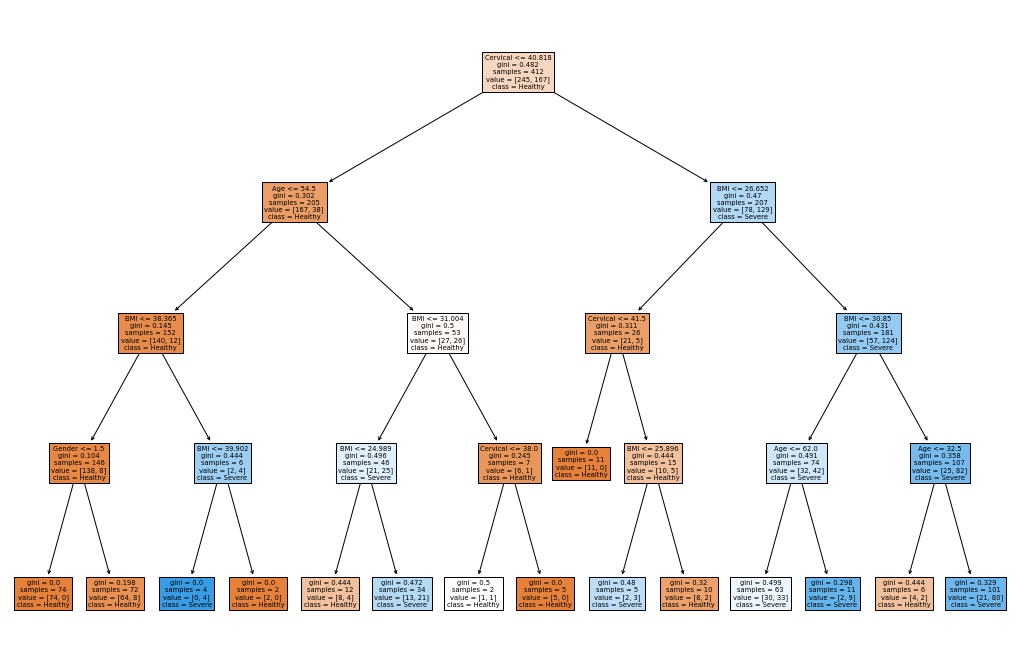

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from numpy import absolute
from numpy import mean
from numpy import std

scoring = ['accuracy','precision','recall']
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier(max_depth=4,random_state=0)
data.OSA = data.OSA.astype("category").cat.codes
X=data[['Gender','BMI','Age','Cervical']]
y=data[['OSA']]
X_features = X.columns
X=X.values
y=y.values
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(clf, X, y, cv=cv,scoring=scoring)
print('Accuracy: %.3f (%.3f)   Precision: %.3f (%.3f)    Recall: %.3f (%.3f)' % (mean(scores['test_accuracy']), std(scores['test_accuracy']),mean(scores['test_precision']), std(scores['test_precision']),mean(scores['test_recall']), std(scores['test_recall'])))
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 12))
clf.fit( X, y)
plot_tree(clf,feature_names=X_features,filled=True,class_names=['Healthy', 'Severe'])